In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd

# Subplots

In [2]:
plt.subplots?

Subplots mean a group of smaller axes (where each axis is a plot) that can exist together within a single figure. Think of a figure as a canvas that holds multiple plots.

With the subplot() function you can draw multiple plots in one figure. The subplot() function takes three arguments that describes the layout of the figure.
The layout is organized in rows and columns, which are represented by the first and second argument.
The third argument represents the index of the current plot.
eg: plt.subplot(1, 2, 1)
#the figure has 1 row, 2 columns, and this plot is the first plot. 

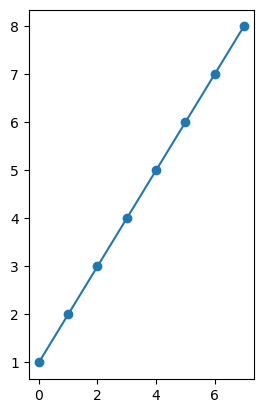

In [3]:
# Let's create a nwe figure - a new canvas for plotting
plt.figure()
# With the subplot function, the list of parameter includes (nrows,ncols,nth-axis)
plt.subplot(1,2,1)
# plotting data
data = np.arange(1,9,1)
plt.plot(data,'-o')

Text(0.5, 1.0, '2nd subplot')

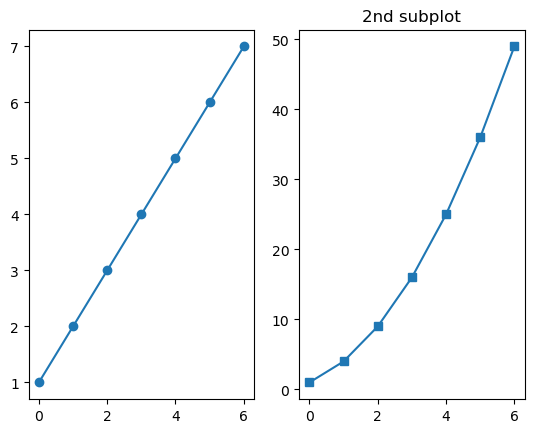

In [4]:
# Now let's clarify the functionality of subplot by ploting 2 subplots in just 1 canvas
# 1st subplot
plt.subplot(1,2,1)
linear_data = np.arange(1,8,1)
plt.plot(linear_data,'-o')
# 2nd subplot
plt.subplot(1,2,2)
exponential_data = linear_data**2
plt.plot(exponential_data, '-s')
plt.title('2nd subplot') # you can clearly how convenient subplot is with this

With subplot, you can store the axis in the subplot and you can call that subplot again, you don't have to deal with seperated axis. 

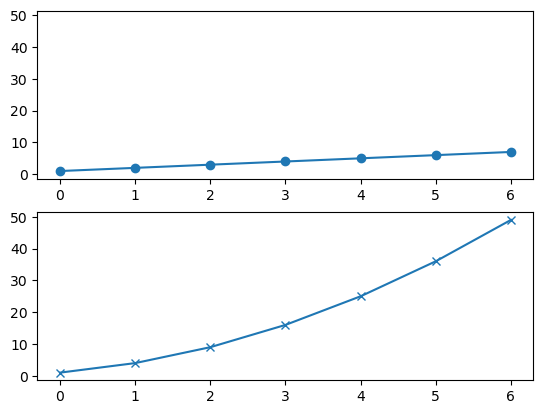

In [5]:
# So you can see from the 2 plots that they share the same y-axis
ax1=plt.subplot(2,1,1)
plt.plot(linear_data,'-o')
# let's combine the 2 plots with the shared y-axis
ax2=plt.subplot(2,1,2,sharey=ax1)
plt.plot(exponential_data,'-x')
# =>=> we've locked the yaxis

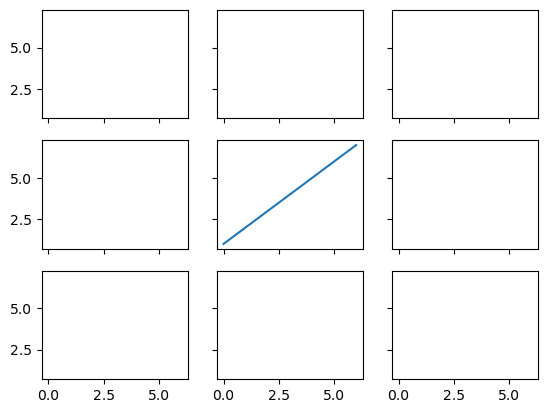

In [6]:
# Using subplots() => give you many subplot()
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharex=True,sharey=True)
ax5.plot(linear_data)

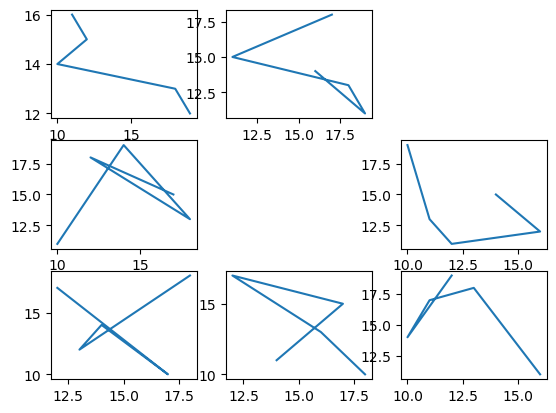

In [7]:
# apart from gca()=> get current axes, matplotlib also has
# gcf() => get current figure => used for subplots()
fig=plt.gcf()
for i in range(1,10):
    if i!=5 and i!=3:
        ax=fig.add_subplot(3,3,i)
                
        # we use the function ax.text for creating direct labels in out chart
#         ax.text(0.5,0.2,str(i),fontsize=18,ha='center')
        
        x=rd.sample(range(10,20),5)
        y=rd.sample(range(10,20),5)
        ax.plot(x,y)

SPLOM practices (Scatter Plot Matrix) is a grid of several scatter plots of up to five numeric variables. The matrix includes individual scatter plots for every combination of variables. A scatter plot matrix can answer questions about your data, such as: What are the relationships between several variables?

In [8]:
df=pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


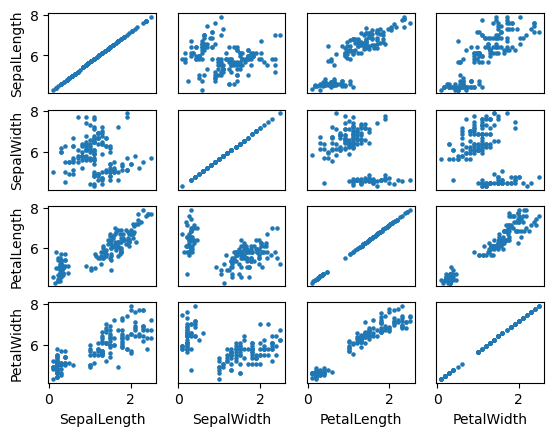

In [9]:
cols = ['SepalLength', 'SepalWidth','PetalLength','PetalWidth']
fig, ax = plt.subplots(len(cols), len(cols))
for i in range(len(cols)):
    for j in range(len(cols)):
        # plot for each row of data
        ax[i,j].scatter(df[cols[i]],df[cols[j]],s=5)
        # remove framing and ticks labels
        ax[i,j].get_xaxis().set_visible(False)
        ax[i,j].get_yaxis().set_visible(False)
        # add labels to the outer most and under most
        if i == len(cols)-1:
            ax[i,j].get_xaxis().set_visible(True)
            ax[i,j].set_xlabel(cols[j])
        if j == 0:
            ax[i,j].get_yaxis().set_visible(True)
            ax[i,j].set_ylabel(cols[i])

# Histograms

A histogram is a graph used to represent the frequency distribution of a few data points of one variable. Histograms often classify data into various “bins” or “range groups” and count how many data points belong to each of those bins.

A Histogram is a bar chart where the x-axis is a set of observation and the y-axis is the frequency of that observation.

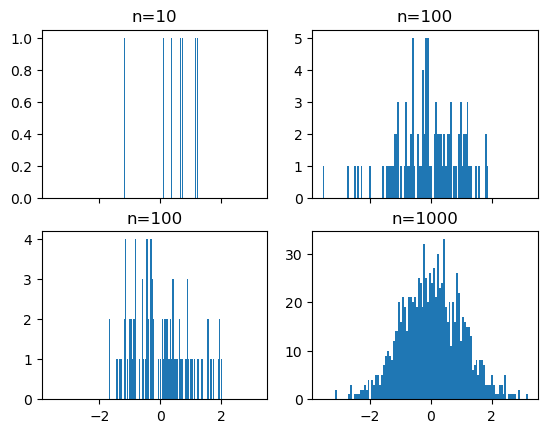

In [10]:
# First lets create a canva figure with 4 subplot, subplots matrix is 2,2
fig, ax = plt.subplots(2,2,sharex=True)
axs=ax
# Let's iterate through each axis to check for histogram uniformity
for i in range(len(axs)):
    for n in range(len(axs)):
        sample_size=10**(i+n+1)
        
        # with np.random.normal(loc='the center value in the x-axis of the histogram', scale='Standard deviation (spread or “width”) of the distribution')
        sample=np.random.normal(loc=0,scale=1.0,size=sample_size,)
        
        # let's plot the sample
        ax[i,n].hist(sample,bins=100)
        # by changing the bins value, we can clearly observe how uniform a histogram is (the bigger it is, the more detail the plot will be)
        #One is a visual of the data at a coarse granularity and one at a more fine-grained granularity. 
        
        ax[i,n].set_title(f'n={sample_size}')

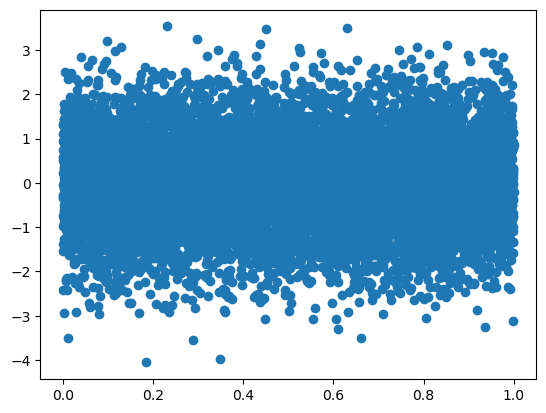

In [11]:
x=np.random.normal(loc=0,scale=1.0,size=10000)
y=np.random.random(10000)
plt.scatter(y,x)

GridSpec. Specifies the geometry of the grid that a subplot will be placed. The number of rows and number of columns of the grid need to be set. Optionally, the subplot layout parameters (e.g., left, right, etc.)

In [12]:
from matplotlib.gridspec import gridspec
plt.figure(figsize=(10,15))
gspec=gridspec.GridSpec(3,3)
top_histogram = plt.subplot(gspec[0,1:])
sideleft_histogram=plt.subplot(gspec[1:,:1])
sideright_histogram=plt.subplot(gspec[2:,2:])
# OKrrr, because I can't use GridSpec because i can't install it from matplotlib library
# So, i will replace it with plt.subplot_mosaic, which also can help me to arrange axes on a figure

ImportError: cannot import name 'gridspec' from 'matplotlib.gridspec' (C:\Users\AD\anaconda3\lib\site-packages\matplotlib\gridspec.py)

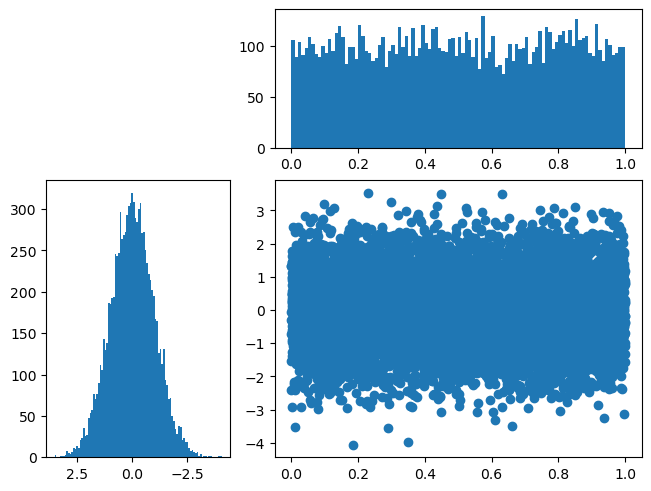

In [13]:
# Let's build the structure of the figure
axd = plt.figure(layout="constrained").subplot_mosaic(
    """
    .AA
    CDD
    CDD
    """
)
# Let's plot some data into it
axd['D'].scatter(y,x)
axd['A'].hist(y,bins=100)
axd['C'].hist(x,bins=100)
axd['C'].invert_xaxis()
# still not perfect :(

# Box Plot

A box and whisker plot—also called a box plot—displays the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median.

In [27]:
# so we will create 3 fake dataset: one for random dataset, one for normal distribution data set and one for gamma distribution dataset.
rand = np.random.random(1000)
norm = np.random.normal(loc=0,scale=1.0,size=1000)
gamm = np.random.gamma(shape=1,scale=1.0,size=1000)
expon = np.random.exponential(2,1000)
unif = np.random.uniform(14,20,1000)
# now, let's install these into a pandas datafram
df = pd.DataFrame({'random': rand,
                    'normal distribution': norm,
                    'gamma distribution': gamm,
                      'exponential':expon,
                      'uniform': unif})
print(df.describe())
print(df.info())

            random  normal distribution  gamma distribution  exponential  \
count  1000.000000          1000.000000         1000.000000  1000.000000   
mean      0.496511             0.022736            0.916548     2.114994   
std       0.287124             0.964690            0.928625     2.120645   
min       0.000300            -3.085882            0.001422     0.000096   
25%       0.247758            -0.648397            0.277716     0.621354   
50%       0.491972             0.069577            0.633319     1.410734   
75%       0.739261             0.685500            1.277720     2.936846   
max       0.998416             2.744375            7.565437    14.081162   

           uniform  
count  1000.000000  
mean     17.069813  
std       1.684527  
min      14.007688  
25%      15.620279  
50%      17.177360  
75%      18.435482  
max      19.997553  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          

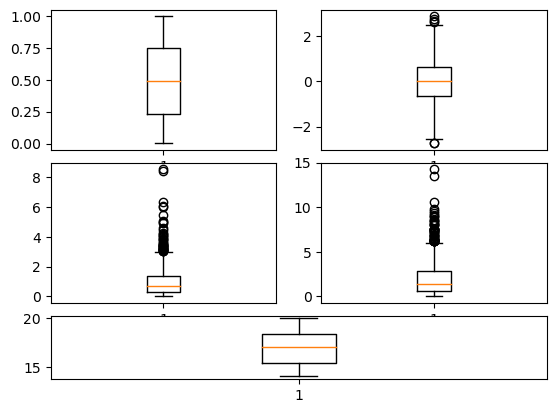

In [15]:
fig,ax=plt.subplot_mosaic(
    """
    AB
    AB
    CD
    CD
    EE
    """
)
ax['A'].boxplot(df['random']);
ax['B'].boxplot(df['normal distribution']);
ax['C'].boxplot(df['gamma distribution']);
ax['D'].boxplot(df['exponential']);
ax['E'].boxplot(df['uniform']);

# well the act of adding a ; at the end of the script is for pressing the information provided by matplotlib. Undo to see the difference

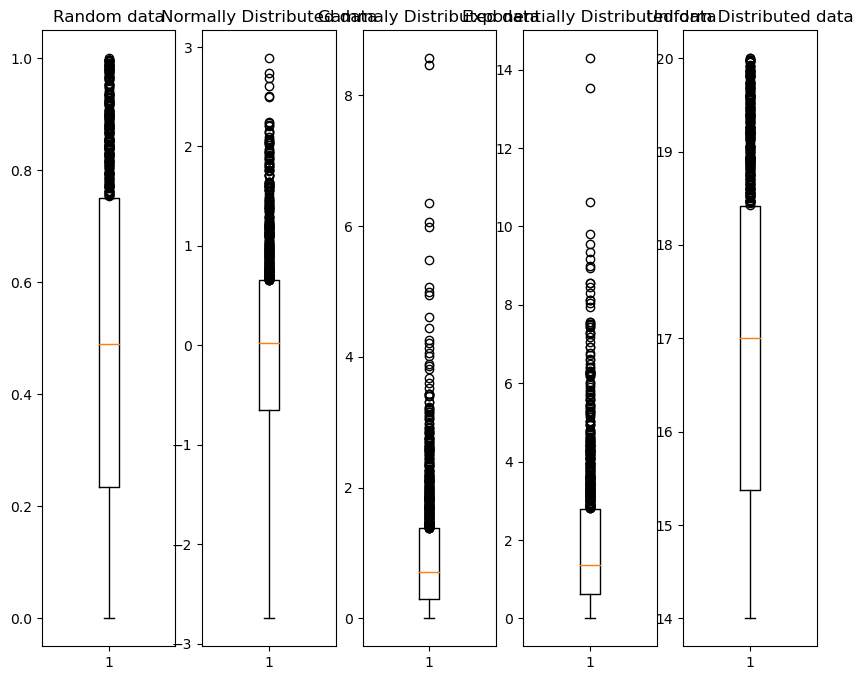

In [16]:
plt.figure(figsize=(10,8))
plt.subplot(1,5,1)
plt.boxplot(rand, whis=[0,50])
plt.title('Random data')

plt.subplot(1,5,2)
plt.boxplot(norm, whis=[0,50])
plt.title('Normally Distributed data')

plt.subplot(1,5,3)
plt.boxplot(gamm, whis=[0,50])
plt.title('Gammaly Distributed data');

plt.subplot(1,5,4)
plt.boxplot(expon, whis=[0,50])
plt.title('Exponentially Distributed data');

plt.subplot(1,5,5)
plt.boxplot(unif, whis=[0,50])
plt.title('Uniform Distributed data');

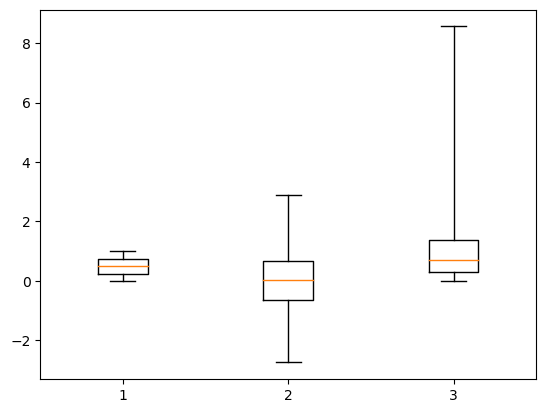

In [17]:
# plot boxplots for all the df's columns
plt.boxplot([df['random'],df['normal distribution'],df['gamma distribution']], whis=[0,100]);

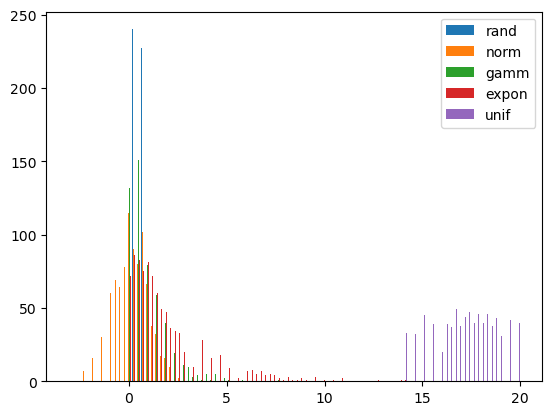

In [28]:
# in visualization, you can use multiple plots for the same dataset to support each other
# and help you to grasp a better fathoming of data
plt.hist([df['random'],df['normal distribution'],df['gamma distribution'], df['exponential'],df['uniform']],bins=100,label=['rand', 'norm','gamm','expon','unif'])
plt.legend()
# uhmm, you can try to see the below visualization of 3 dataset 
# to see the corresponding shape of each one.

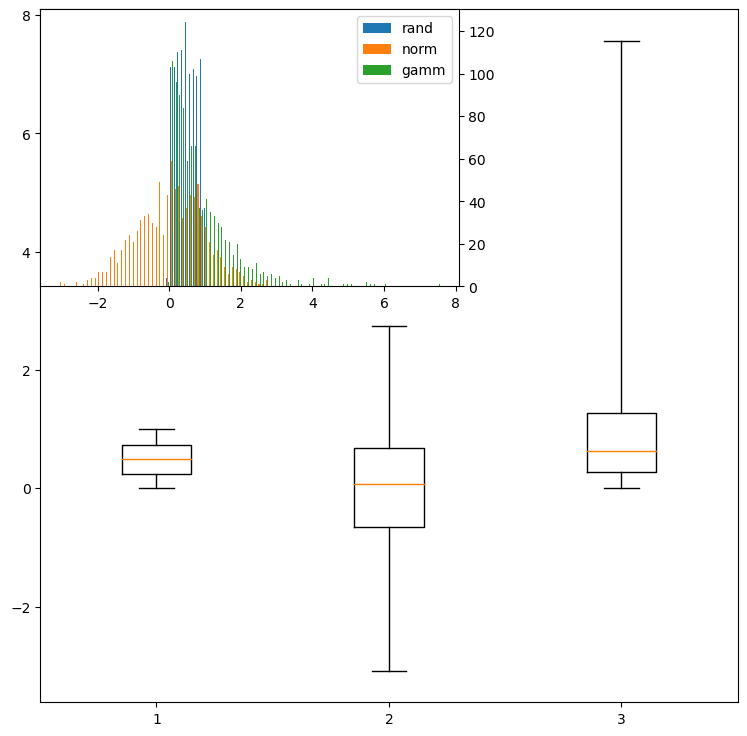

In [29]:
# let's do something which is more interesting than just arranging the axes in a canvas
# let's integrate one axis into another in the same canvas with the inset_axes() function
plt.figure(figsize=(9,9))
plt.boxplot([df['random'],df['normal distribution'],df['gamma distribution']], whis=[0,100]);# inset_axis([left,right,width,height])
ax2 = plt.gca().inset_axes([0,0.6,0.6,0.4])
ax2.hist([df['random'],df['normal distribution'],df['gamma distribution']],bins=100,label=['rand', 'norm','gamm'])
ax2.yaxis.tick_right();
# using the tick_right() to adjust the position of y-axis tick label to occur
ax2.legend();

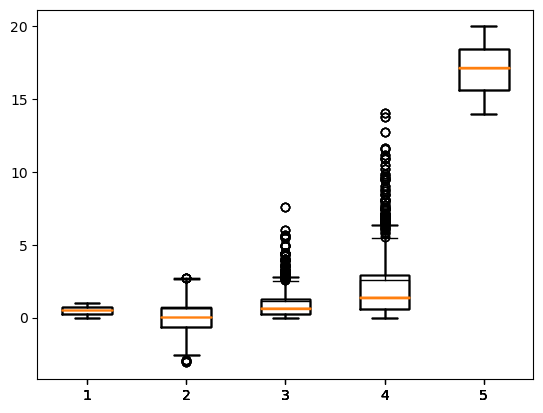

In [30]:
# let's dive deeper into the outliers of boxplot
#  An outlier is an observation that lies an abnormal 
# distance from other values in a random sample from a population.
for x in range(len(df.columns)):
    iqr=np.quantile(df.iloc[:,x],0.75)-np.quantile(df.iloc[:,x],0.25)
    lowerlim = np.quantile(df.iloc[:,x],0.25)-iqr*1.5
    upperlim = np.quantile(df.iloc[:,x],0.75)+iqr*1.5
    clean=df.query(f"`{list(df.columns)[x]}`>{lowerlim} & `{list(df.columns)[x]}`<{upperlim}")
    plt.boxplot(clean)

# Heatmaps

In [19]:
df=pd.read_csv("NYC hourly traffic.csv")
df

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,08/06/2022,0,I,2820,649
1,21,08/06/2022,1,I,2124,474
2,21,08/06/2022,2,I,1617,391
3,21,08/06/2022,3,I,1228,358
4,21,08/06/2022,4,I,1604,368
...,...,...,...,...,...,...
1936271,11,01/01/2010,19,I,2675,1152
1936272,11,01/01/2010,20,I,2580,1086
1936273,11,01/01/2010,21,I,2302,987
1936274,11,01/01/2010,22,I,2170,910


In [20]:
df['Date']=pd.to_datetime(df['Date'])

In [21]:
sample=df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'")
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


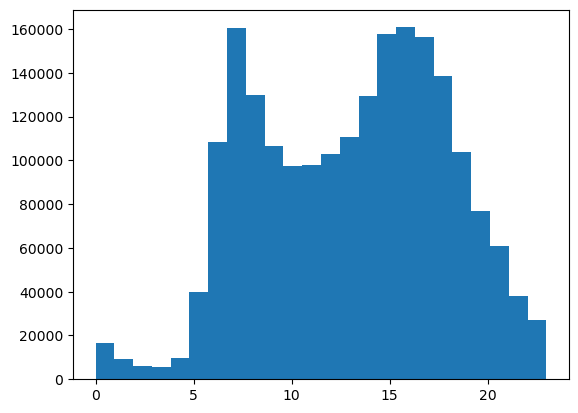

In [22]:
plt.hist(sample["Hour"],bins=24,weights=sample["# Vehicles - E-ZPass"]);

C:\Users\AD\AppData\Local\Temp\ipykernel_9724\1733533496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Day of Week"]=sample["Date"].dt.dayofweek


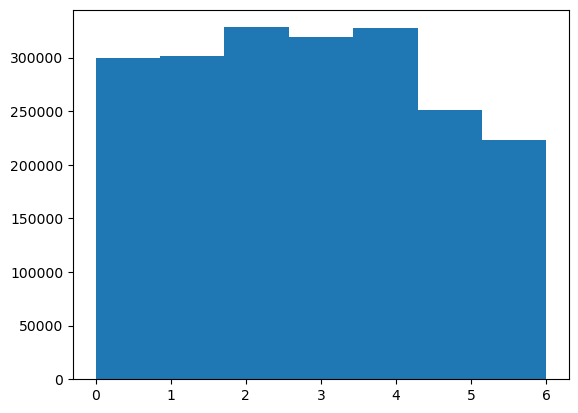

In [23]:
sample["Day of Week"]=sample["Date"].dt.dayofweek
plt.hist(sample["Day of Week"],bins=7,weights=sample["# Vehicles - E-ZPass"]);

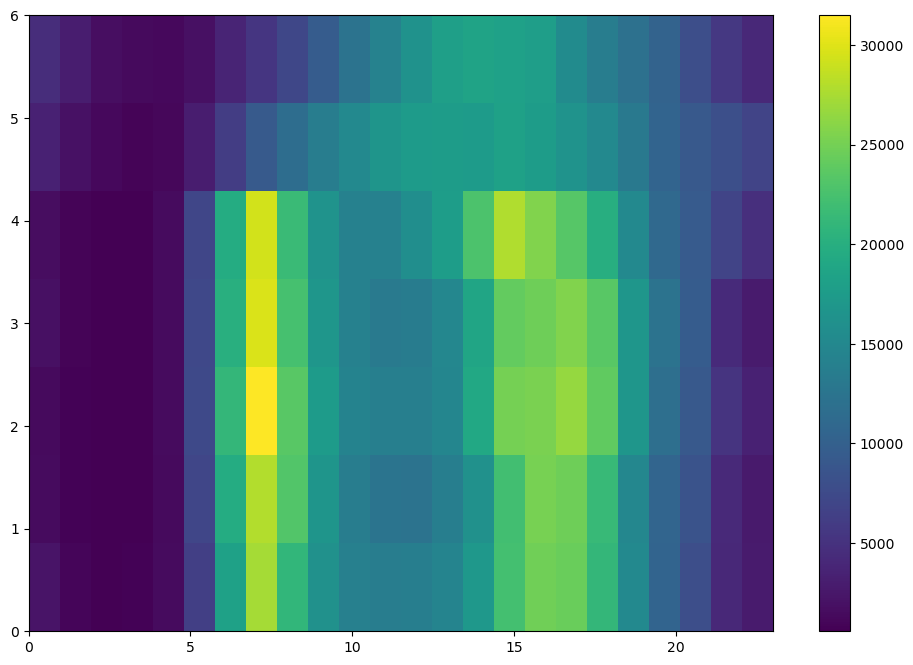

In [24]:
plt.figure(figsize=(12,8)) # make a slightly bigger figure
plt.hist2d(sample["Hour"],
           sample["Day of Week"],
           bins=[24,7],
           weights=sample["# Vehicles - E-ZPass"])

# This next part is optional, but adds a legend telling you the value
# of each bin (cell) in the histogram
plt.colorbar();